<center><font face='Georgia'> 

# Natural Language Processing. 

    
<center><font size=5 color ='grey' > <i><b>Project<b></i> : Sentiment analysis  </center></font>
                 
<img src="https://www.artsixmic.fr/wp-content/uploads/2015/08/Twitter_logo-e1439215607207.jpg" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb KAlRDb" alt="L'oiseau Twitter tente le rebond - artsixMic" data-noaft="1" id="imi" data-w="600" data-h="487" style="width: 219px; height: 177.755px; margin: 21.5225px 0px;">


------



> **Fait par :**
<font color ='darkblue' face='Georgia' >    
 1.Ramy HAFDI.  
 2.Med. Mondhir CHAALAL.
</font>
    
> **Décembre 2021**
    



# Importing the libraries

In [ ]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import nltk  # for text manipulation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re  # for regular expressions 
import string
# from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import emoji
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
pd.set_option("display.max_colwidth", 200)  

# Importing the data files

In [ ]:
df_racism=pd.read_csv("tweet_df_racism.csv")
df_racism.head(5)

,Tweet
0,"RT @itsJeffTiedrich: holy fucking shit, protesting hundreds of years of systemic racism is not ""just as bad"" as going apeshit at the Capito…"
1,"RT @GoodLawProject: No civilised country should embed racism in its legal system. If you agree, sign the petition ⬇️"
2,RT @MapleLeafs: Racism has no place in hockey. #TapeOutHate https://t.co/B1aJsygmrM
3,"RT @divafeminist: Many of us have multiple comorbidities because of poverty, racism, organized abandonment,and or ableist built-environment…"
4,The three white men who chased and killed Ahmaud Arbery will soon stand trial on federal hate crimes charges in which jurors will have to decide whether the slaying of the running Black man was mo...


Text is an  exceedingly unstructured frame of information, that's why text preprocessing is done to make sure the data is clean before being pused into modeling phase.

## Data Cleaning

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features.

The objective of this step is to <strong>clean</strong> noise which is less relevant to find the sentiment of tweets such as punctuation, special characters, numbers....etc


Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

#### 1. Removing Twitter Handles (@user)

Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [ ]:
df_racism['tidy_tweet'] = np.vectorize(remove_pattern)(df_racism['Tweet'], "@[\w]*") 

#### 2. Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [ ]:
df_racism['tidy_tweet'] = df_racism['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


#### 3. Removing Short Words

In [ ]:
df_racism['tidy_tweet'] = df_racism['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_racism.head(3)

,Tweet,tidy_tweet
0,"RT @itsJeffTiedrich: holy fucking shit, protesting hundreds of years of systemic racism is not ""just as bad"" as going apeshit at the Capito…",holy fucking shit protesting hundreds years systemic racism just going apeshit Capito
1,"RT @GoodLawProject: No civilised country should embed racism in its legal system. If you agree, sign the petition ⬇️",civilised country should embed racism legal system agree sign petition
2,RT @MapleLeafs: Racism has no place in hockey. #TapeOutHate https://t.co/B1aJsygmrM,Racism place hockey #TapeOutHate https aJsygmrM


# Sentiment analysis 

## Polarity and subjectivity

In [ ]:
df_racism[['polarity', 'subjectivity']] = df_racism['tidy_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [ ]:
df_racism.head(3)

,Tweet,tidy_tweet,polarity,subjectivity
0,"RT @itsJeffTiedrich: holy fucking shit, protesting hundreds of years of systemic racism is not ""just as bad"" as going apeshit at the Capito…",holy fucking shit protesting hundreds years systemic racism just going apeshit Capito,-0.2,0.8
1,"RT @GoodLawProject: No civilised country should embed racism in its legal system. If you agree, sign the petition ⬇️",civilised country should embed racism legal system agree sign petition,0.2,0.2
2,RT @MapleLeafs: Racism has no place in hockey. #TapeOutHate https://t.co/B1aJsygmrM,Racism place hockey #TapeOutHate https aJsygmrM,0.0,0.0


## Sentiment intensity 

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

MyAnalyzer=SentimentIntensityAnalyzer()

for index,row in df_racism['tidy_tweet'].iteritems():
  the_score=MyAnalyzer.polarity_scores(row)
  negative = the_score['neg']
  neutral = the_score['neu']
  positive = the_score['pos']
  if ((negative > positive)&(negative > neutral)):
    df_racism.loc[index, 'sentiment'] ='negative'
  elif ((positive > negative)&(positive >neutral)):
    df_racism.loc[index, 'sentiment'] = 'positive'
  else:
    df_racism.loc[index, 'sentiment'] ='neutral'
    
  df_racism.loc[index, 'neg'] = negative
  df_racism.loc[index, 'neu'] = neutral
  df_racism.loc[index, 'pos'] = positive
df_racism.head(5)

,Tweet,tidy_tweet,polarity,subjectivity,sentiment,neg,neu,pos
0,"RT @itsJeffTiedrich: holy fucking shit, protesting hundreds of years of systemic racism is not ""just as bad"" as going apeshit at the Capito…",holy fucking shit protesting hundreds years systemic racism just going apeshit Capito,-0.200000,0.800000,negative,0.619,0.381,0.000
1,"RT @GoodLawProject: No civilised country should embed racism in its legal system. If you agree, sign the petition ⬇️",civilised country should embed racism legal system agree sign petition,0.200000,0.200000,neutral,0.272,0.464,0.265
2,RT @MapleLeafs: Racism has no place in hockey. #TapeOutHate https://t.co/B1aJsygmrM,Racism place hockey #TapeOutHate https aJsygmrM,0.000000,0.000000,neutral,0.451,0.549,0.000
3,"RT @divafeminist: Many of us have multiple comorbidities because of poverty, racism, organized abandonment,and or ableist built-environment…",Many have multiple comorbidities because poverty racism organized abandonment ableist built environment,0.250000,0.250000,negative,0.545,0.455,0.000
4,The three white men who chased and killed Ahmaud Arbery will soon stand trial on federal hate crimes charges in which jurors will have to decide whether the slaying of the running Black man was mo...,three white chased killed Ahmaud Arbery will soon stand trial federal hate crimes charges which jurors will have decide whether slaying running Black motivated racism https kBcu jmsMk,-0.291667,0.333333,neutral,0.356,0.569,0.074


### Counting values (positive, neutral and negative)

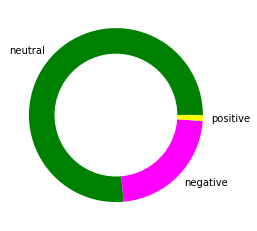

,Total,Percentage
neutral,764,76.4
negative,225,22.5
positive,11,1.1


In [ ]:
#Function for calculating the values

def count_values(dataframe,feature):
 total=dataframe.loc[:,feature].value_counts(dropna=False)
 percentage=round(dataframe.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])



value_count=count_values(df_racism,'sentiment')

# Draw a Circle chart
names= value_count.index
size=value_count['Percentage']

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','magenta','yellow'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
value_count


As we can see a majority of our tweets are neutral/negative as it's very hard to speak about racism in a positive way 

# Machine learning Approach

Here we would like to develop our own machine learnig model and train it to detect hate speech in tweets, here we are using a <strong> Different</strong> dataset, one with <strong> labeled</strong> tweets, with values:

- 0 if the tweet is clean (neutral or positive)
- 1 if the tweet has a sexist/racist tone (negative)

In [ ]:
racism_train  = pd.read_csv("train_tweets.csv") 

In [ ]:
racism_train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [ ]:
racism_train.shape

(31962, 3)

## Data Inspection

In [ ]:
racism_train.shape, racism_train["label"].value_counts()

((31962, 3), 0    29720
 1     2242
 Name: label, dtype: int64)

Our Dataset has 31,962 tweets, in whcih  we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. 

This is an imbalanced classification problem

### Data Cleaning 

In the same manner as the first approach, here we also need to do some Data cleaning and pre-processing before we can start our modeling, we will mainly be using the functions mentioned in the above method, as well as add some pre-procesing needed before modeling

#### 1. Removing Twitter Handles (@user)


In [ ]:
racism_train['tidy_tweet'] = np.vectorize(remove_pattern)(racism_train['tweet'], "@[\w]*") 

#### 2. Removing Punctuations, Numbers, and Special Characters

In [ ]:
racism_train['tidy_tweet'] = racism_train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


#### 3. Removing Short Words

In [ ]:
racism_train['tidy_tweet'] = racism_train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#### 4. Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
tokens_tweet = racism_train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokens_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can normilize the tokenized tweets

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
# stemming
tokens_tweet = tokens_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokens_tweet.head(3)

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
Name: tidy_tweet, dtype: object

Now let's join these tokens back together

In [ ]:
for i in range(len(racism_train)):
    tokens_tweet[i] = ' '.join(tokens_tweet[i])    
racism_train['tidy_tweet'] = tokens_tweet
racism_train.head(3)

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0,bihday your majesty,bihday your majesti


### Visualization from tweets

In this part we will try to explored our processed tweets (tidy tweets), by exploring and visualizing that data to gain more insights.We will be trying to answer the following questions.

- What are the most frequent words in this entire dataset?
- What are the most frequent words in the dataset for negative and positive tweets ?
- How many hashtags are there in a tweet, do they carry an important weight and should we remove or leave them?
- Which trends are associated with my dataset? 


#### Finding the common words: using WordCloud

Here we will be using one of the most known and used visualazation tool for NLP problems, the <strong>WordCloud</strong>

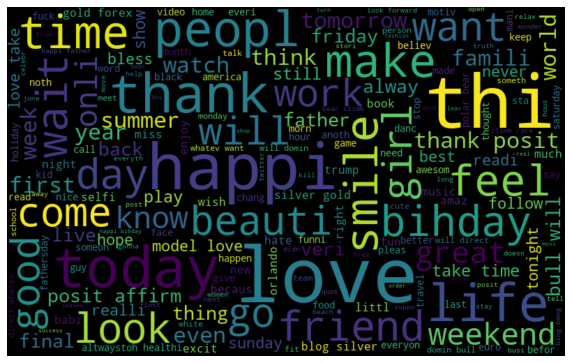

In [ ]:
from wordcloud import WordCloud 

all_words = ' '.join([text for text in racism_train['tidy_tweet']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

We can see most of the words are positive or neutral. Words like <b>love</b>, <b>great</b>, <b>friend</b>, <b>life</b> are the most frequent ones. But it doesn’t give us any idea about the words associated with the racist/sexist tweets. (because the positive tweets are most dominant in our dataset)


Therefore, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

#### Words in non racist/sexist tweets

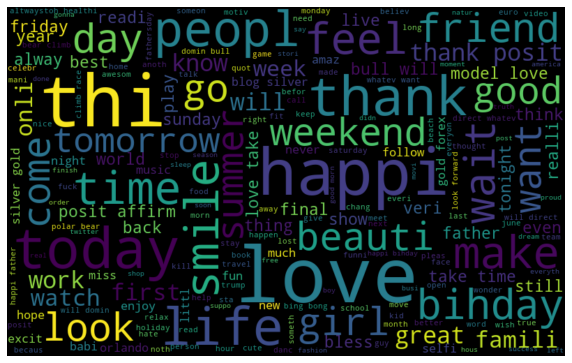

In [ ]:
normal_words =' '.join([text for text in  racism_train['tidy_tweet'][ racism_train['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most of the frequent words are compatible with the sentiment (such as <b>love</b>, <b>friend</b>, <b>happi</b>, <b>beauti</b> ...et) , i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expecting to see negative, racist, and sexist terms.

#### Racist/Sexist Tweets

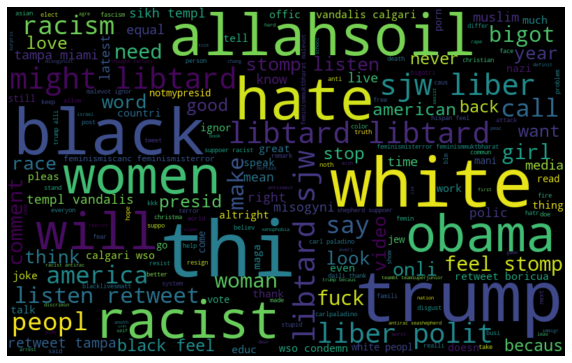

In [ ]:
normal_words =' '.join([text for text in racism_train['tidy_tweet'][ racism_train['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

As we can clearly see, most of the words have negative connotations (like <b>racist</b>, <b>hate</b>, <b>Trump</b> who is a somewhat controversial figure in american politics) .

Now, it seems we have a pretty good text data to work on. 

Next we will see the hashtags/trends in our twitter data.

### Hashtags and their impact:

Hashtags in twitter culture represent the ongoing trends, what most people talk about at that specific time. So we need to see if they have a significant value in determining the sentiment.

For example considering this tweet:

-<b>"Trump has always had a very hateful/hostile relationship towards women working in politics, something has to be done about that. </b> <span style="background-color: #FFFF00">#trump</span> <span style="background-color: #90ed61">#feminism</span> <span style="background-color: #6a99e6">#misogynist </span> "

It is intuitivly obvious that this tweet has a sexist/racist tone, and the hashtags do convey the same sentiments.

##### **conclusion:**
Hashtags are representative of sentiments and very usefull

We will look at the hashtags/trends in both sexist/racist or not tweets. 

In [ ]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(racism_train['tidy_tweet'][racism_train['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(racism_train['tidy_tweet'][racism_train['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Now that we have extracted the hashtags let's take a look at them, and which hashtags are most frequent
##### Non-Racist/Sexist Tweets

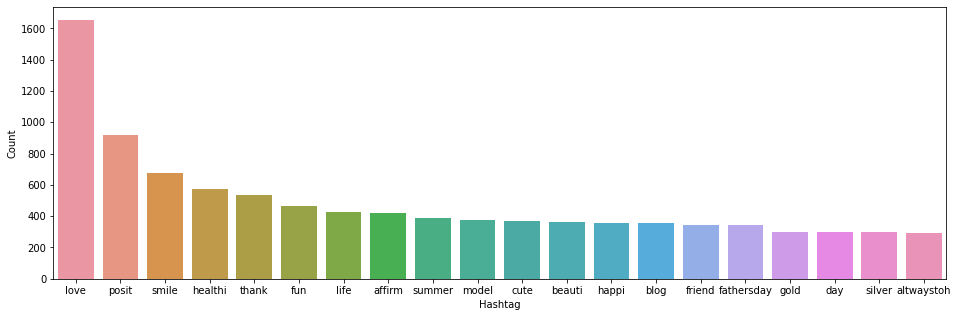

In [ ]:
import seaborn as sns
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

We can see that all these hashtags are <b>positive</b> which makes sense since we are working on the non racist/sexist tweets, for the second plot we expect to see <b>negative</b> hashtags

##### Racist/Sexist Tweets

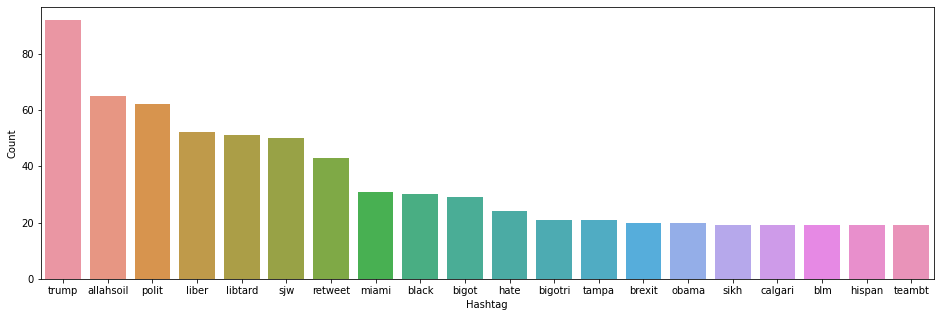

In [ ]:
a = nltk.FreqDist(HT_negative) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

As expected, most of the terms in the histogram are negative with a few neutral ones, so it would be good to keep these hashtags in our data since they have useful information. Next step is extracting features (the fun part ;)

### Features extraction

Feature extraction is the process of determining the features to be used for learning
is one of the most important step in any machine learning project, and is even more vital in NLP projects such as ours, therefore we will use 2 different techniques (Bag-of-words and word2vec)


### Method1: Bag-of-Words features

This is one of the easiest and most know method out there, the idea of it is simple.

Given that we have a Corpus C, made of D Documents(sentences), i.e. C={d1,d2…..dD} and we extract N unique tokens(words) from the entire Coprus C, those token will form our Dictionary

Now The size of our bag of words Matrix is gonna be D x N, which each row in the matrix containing the frequencies of our tokens (number of appearances in the whole corpus). Pretty simple right ;)

In [ ]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(racism_train['tidy_tweet']) 
bow.shape

(31962, 1000)

As we can see we have 1000 features (columns in the BOW matrix)

### Method2: Word2Vec Features

Word embedding is a  modern and powerful method of feature extractions in NLP problems, the objective is represent words as vectors and perform operation on these vectors to produce new ones (new words and meaning) for example: <b>Woman + Crown = Queen</b>


####  Word2Vec Embeddings

Word2Vec is a technique which uses shallow neural networks to map word(s) to the target variable that is also word(s), the <b>weights</b> used in these networks act as word vector represantations.

There are 2 options when is comes to using Word2vec, we can .

- Use pre-trained word vectors availible for public use, such as: Google News Word Vectors, Freebase names, DBPedia vectors (wiki2vec)....etc.

- Train our own word vector

In this case we will train our own word vector, since the pre trained ones tend to have a <b>huge</b> size (in GB)

In [ ]:
import gensim
#from gensim.models.doc2vec import LabeledSentence

In [ ]:
tokenized_tweet = racism_train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(racism_train['tidy_tweet']), epochs=20)

(4161779, 4904460)

#### Applying Vectors to Tweets

Because our data constains tweets and not just individual words, we will use the word vectors from word2vec model to create vector representation for an entire tweet.

We will use this function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 

wordvec_df.shape    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(31962, 200)

Now we have 200 new features, whereas in Bag of Wordswe had 1000 features. so there is a reduction in dimensionality

### Modelling 
Now that we are done with all the pre-modeling stages. We will be building models on the datasets with the 2 different feature sets (methods) prepared in the earlier sections — Bag-of-Words and word2vec vectors. We will use the following ML algorithms to build models:

-Logistic Regression, Support Vector Machine and XGBoost


For our evaluation metric, we'll use the **F1 score**


#Logistic Regression

It's a well known classification algorithm, used to predict a binary outcome (0 or 1), given a set of independant variable, which fits our case.


## Features set 1: Bag-of-Word


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [ ]:
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, racism_train['label'])    
#creating an instance of the model 
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 sinon 0 
prediction_int = prediction_int.astype(np.int)
# calculating f1 score for the validation set
f1_score(yvalid, prediction_int) 

0.567926455566905

## Features set 2: Word2vec

In [ ]:
xtrain_w2v = wordvec_df.iloc[ytrain.index,:] 
xvalid_w2v = wordvec_df.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)


0.5802357207615595

# Support Vector Machines (SVM)

It's a supervised learning algorithm used for both classification and regression, but mostly classification

In [ ]:
from sklearn import svm

## Features set 1: Bag-of-Word

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5217391304347826

## Features set 2: Word2vec

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5834633385335414

# Extreme Gradient Boosting (XGBoost)

It is an advanced implementaion of the gradient boosting algorithm, it also also very fast because of the ability to do parralel computations on a single machine. it also has a regularization feauture which helps in reducing overfitting

In [ ]:
from xgboost import XGBClassifier

## Features set 1: Bag-of-Word

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.547846889952153

## Features set 2: Word2vec

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6600877192982456

# Conclusion

We can deduce from the evaluation scores, that using the Word2vec feautures set out performed the Bag of words features set in all of the models. 

we can also see that the XGBoost model using Word2Vec feautures outperforms **All** Other models (~66 % F1 score)